In [1]:
import pandas as pd
import seaborn as sns
import re

In [2]:
df_whole = pd.read_csv('../data/processed/02_cleaned_data.csv', index_col=0)

In [3]:
df_whole.shape

(974, 836)

In [4]:
df_whole.head()

,AP1. Wie alt sind Sie?,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_10.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,...,W7[SQ004]. Welche Form von Vergütung erhalten Sie? [Weihnachtsgeld],W7[SQ005]. Welche Form von Vergütung erhalten Sie? [Urlaubsgeld],W7[SQ006]. Welche Form von Vergütung erhalten Sie? [Sachwerte],W8[SQ001]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Arbeitszeitausgleich],W8[SQ002]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Bezahlung],W8[SQ003]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Sachwerte],W8[SQ004]. Wie werden zusätzlich geleistete Arbeitsstunden vergütet bzw. ausgeglichen? [Gar nicht],W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_1,W9. Bekommen Sie Ihre Vergütung pünktlich zum vertraglich vereinbarten Zeitpunkt?_Teils,id. Antwort ID
0,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,953
1,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,24
2,4.0,False,False,False,False,False,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,57
3,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,65
4,2.0,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,93


# Correlation Analysis

In [5]:
# Calculate the correlation matrix
corr_matrix = df_whole.corr(method='pearson')

# Gather unique pairs of correlations
correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Start from i+1 to avoid duplicates and self-correlations
        correlations.append([corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]])

# Create a DataFrame to hold the correlations
corr_df = pd.DataFrame(correlations, columns=['Column1', 'Column2', 'CorrelationCoefficient'])

print(corr_df)

                                                  Column1  \
0                                  AP1. Wie alt sind Sie?   
1                                  AP1. Wie alt sind Sie?   
2                                  AP1. Wie alt sind Sie?   
3                                  AP1. Wie alt sind Sie?   
4                                  AP1. Wie alt sind Sie?   
...                                                   ...   
349025  W8[SQ004]. Wie werden zusätzlich geleistete Ar...   
349026  W8[SQ004]. Wie werden zusätzlich geleistete Ar...   
349027  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   
349028  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   
349029  W9. Bekommen Sie Ihre Vergütung pünktlich zum ...   

                                                  Column2  \
0                              AP1. Wie alt sind Sie?_0.0   
1                              AP1. Wie alt sind Sie?_1.0   
2                             AP1. Wie alt sind Sie?_10.0   
3                      

In [6]:
print(corr_df.head())
len(corr_df)

                  Column1                      Column2  CorrelationCoefficient
0  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_0.0               -0.171088
1  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_1.0               -0.439317
2  AP1. Wie alt sind Sie?  AP1. Wie alt sind Sie?_10.0                0.238574
3  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_2.0               -0.456176
4  AP1. Wie alt sind Sie?   AP1. Wie alt sind Sie?_3.0               -0.120672


349030

In [7]:
corr_df_sorted = corr_df.sort_values(by='CorrelationCoefficient')

In [8]:
significant_corr_df =  corr_df[(corr_df['CorrelationCoefficient']>0.7) | (corr_df['CorrelationCoefficient']<-0.7)]
len(significant_corr_df)

549

In [9]:
significant_corr_df.to_csv('../data/processed/03_significant_correlations.csv')
corr_df.to_csv('../data/processed/03_all_correlations.csv')

# visualizations

## functions

In [10]:
def cross_analysis_one_hot(cols_first:list, cols_second:list, df=df_whole):
    '''
    A function that performs a cross analysis between two one hot encoded questions. 
    It returns a dataframe with sum and percentage values for combinations of the first and second columns from the whole dataframe.
    
        Parameters:
        - cols_first (list of strings of column names) -> those become the index of the new dataframe
        - cols_second (list of string of column names) -> those become the columns of the new dataframe
        - df (dataframe, standard: df_whole) -> dataframe with columns specified in cols_first and cols_second
    
        Returns:
        - pandas DataFrame with sum and percentage values of index-column combinations
        - list of percentage column names that can be used for data visualization
    '''
    
    # initialize empty DataFrame
    aggregated_df = pd.DataFrame(index=cols_first, columns=cols_second).fillna(0)

    for level_index in cols_first:
        for level_cols in cols_second:
            # Sum the age counts for the current career path
            aggregated_df.loc[level_index, level_cols] = df[df[level_index] == True][level_cols].sum()
        
    # rename indices and column names
    aggregated_df.columns = cols_second

    #aggregated_df.index = career
    aggregated_df['totals'] = aggregated_df.sum(axis=1)
    
    ls_perc_columns = []
    for col in aggregated_df.loc[:, aggregated_df.columns != 'totals'].columns:
        percentage_column_name = f'{col}Percentage'
        ls_perc_columns.append(percentage_column_name)
        aggregated_df[percentage_column_name] = (aggregated_df[col] / aggregated_df['totals']) * 100
    
    
    return aggregated_df, ls_perc_columns

In [11]:
def cross_analysis_non_one_hot(col_name:str, oh_cols:list, df=df_whole, transpose=False):
    '''
    Aggregate data based on a non-hot-encoded column for multiple one-hot-encoded columns.

    Parameters:
    - col_name: str, name of the non-one-hot-encoded column.
    - oh_cols: list of str, names of the one-hot-encoded-columns.
    - df: pandas DataFrame containing the data.

    Returns:
    - pandas DataFrame with aggregated data and percentages for each category in the non-hot encoded column.
    - list of percentage column names that can be used for data visualization
    '''
    # Initialize aggregation dictionary
    agg_dict = {col: pd.NamedAgg(column=col, aggfunc='sum') for col in oh_cols}
    
    # Aggregate the data
    df_aggregated = df.groupby(col_name).agg(**agg_dict).reset_index()
    
    if transpose == False:
        # Calculate totals
        df_aggregated['totals'] = df_aggregated[oh_cols].sum(axis=1)

        # Calculate percentages for each contract type
        ls_perc_columns = []
        for col in oh_cols:
            percentage_col = f'{col}Perc'
            ls_perc_columns.append(percentage_col)
            df_aggregated[percentage_col] = (df_aggregated[col] / df_aggregated['totals']) * 100
            df_aggregated[percentage_col].fillna(0, inplace=True)  # Handle division by zero
    
    else: #Todo:write process for transposed data
        df_aggregated = df_aggregated.T
        df_aggregated

    return df_aggregated, ls_perc_columns

In [69]:
agg_dict = {col: pd.NamedAgg(column=col, aggfunc='sum') for col in ls_cols_career}

In [72]:
temp_df = df_whole.groupby('CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt?\xa0\xa0').agg(**agg_dict).reset_index()
temp_df.T

,0,1
"CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt?",0.0,1.0
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",33.0,37.0
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",58.0,48.0
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",30.0,14.0
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",252.0,121.0
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",25.0,17.0
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",172.0,97.0


## try out scatter plot

In [12]:
significant_corr_df.iloc[0][1]

/tmp/ipykernel_11637/2159218889.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  significant_corr_df.iloc[0][1]


'AP5r[SQ002]. Bitte machen Sie folgende Angaben:\xa0 [In wie vielen Berufsjahren insgesamt (Jahre in Ziffern)? ]'

/tmp/ipykernel_11637/1352033493.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x=significant_corr_df.iloc[0][0],
/tmp/ipykernel_11637/1352033493.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=significant_corr_df.iloc[0][1],


<Axes: xlabel='AP1. Wie alt sind Sie?', ylabel='AP5r[SQ002]. Bitte machen Sie folgende Angaben:\xa0 [In wie vielen Berufsjahren insgesamt (Jahre in Ziffern)? ]'>

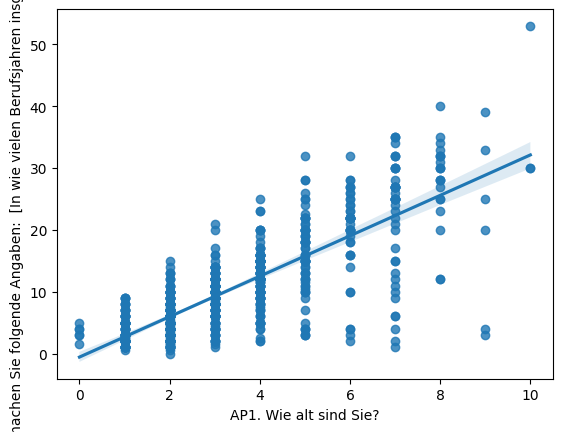

In [13]:
sns.regplot(data=df_whole, 
            x=significant_corr_df.iloc[0][0], 
            y=significant_corr_df.iloc[0][1],
            ci=95)

## fixed term vs permanent contracts Museum

In [14]:
#extract columns with education levels
ls_cols_education_level = [col for col in df_whole if col.startswith('AP2[')]
ls_cols_contract = [col for col in df_whole if col.startswith('M9.')]

#extract education levels
# Regular expression to find a string inside square brackets at the end of column
pattern = re.compile(r'\[([^\]]*)\]$')
strings_inside_brackets = [pattern.search(col).group(1) if pattern.search(col) else None for col in ls_cols_education_level]
print(strings_inside_brackets)

['Bachelor of Arts: ', 'Master of Arts:', 'Magister Artium:', 'I. Staatsexamen:', 'II. Staatsexamen:', 'Diplom:', 'Dr. phil.:', 'Dr. phil. habil. bzw. PD:', 'Sonstiges:', 'Ausländischer akademischer Grad:']


In [15]:
edu_con_df, educ_con_cols_perc = cross_analysis_one_hot(ls_cols_education_level, ls_cols_contract)
edu_con_df

,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Percentage,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Percentage"
AP2[SQ001]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Bachelor of Arts: ],41,12,53,77.358491,22.641509
AP2[SQ002]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Master of Arts:],129,46,175,73.714286,26.285714
AP2[SQ003]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Magister Artium:],40,58,98,40.816327,59.183673
AP2[SQ004]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [I. Staatsexamen:],1,1,2,50.000000,50.000000
AP2[SQ005]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [II. Staatsexamen:],0,1,1,0.000000,100.000000
AP2[SQ006]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Diplom:],3,2,5,60.000000,40.000000
AP2[SQ007]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Dr. phil.:],49,70,119,41.176471,58.823529
AP2[SQ008]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Dr. phil. habil. bzw. PD:],2,1,3,66.666667,33.333333
AP2[SQ009]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Sonstiges:],4,4,8,50.000000,50.000000
AP2[SQ010]. Welchen akademischen Grad haben Sie als letztes in welchem Jahr erworben? [Ausländischer akademischer Grad:],1,3,4,25.000000,75.000000


Text(1.02, 0.985, 'Gesamtzahl')

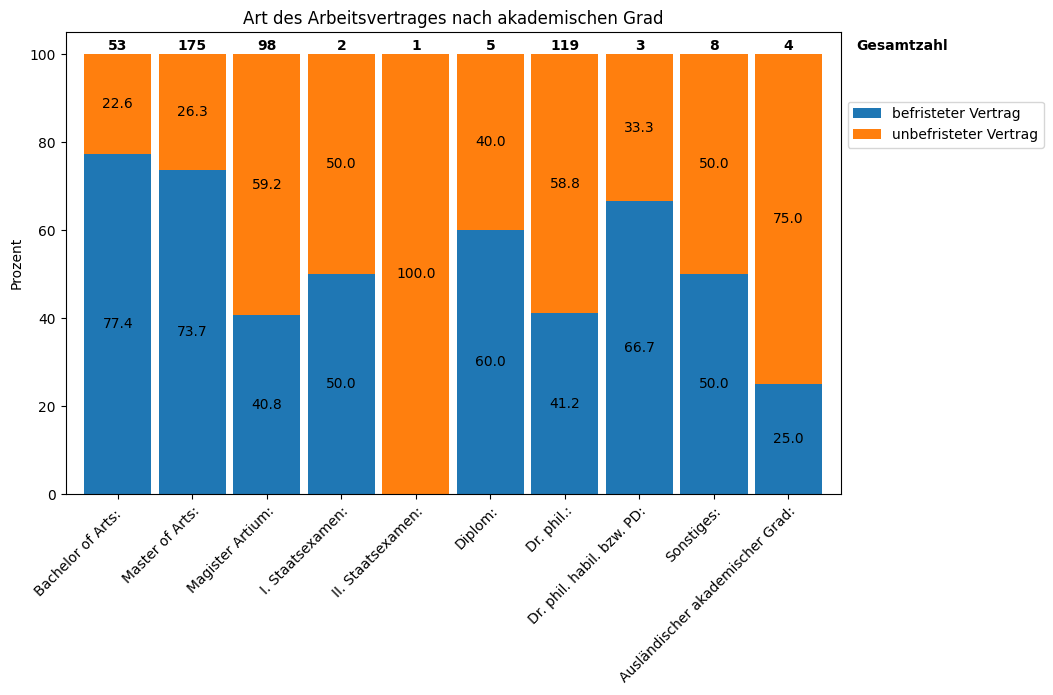

In [16]:
ax = edu_con_df[educ_con_cols_perc].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(10, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach akademischen Grad'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(edu_con_df['totals']):
    ax.text(edu_con_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(strings_inside_brackets, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')
    

In [17]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_00_Abschluss_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

## fixed term or permanent contracts by age group

In [18]:
ls_cols_age_level = [col for col in df_whole if col.startswith('AP1.') & col.endswith('.0')]
#the order of age levels needs to be sorted by hand, since age level 10 is not placed at the end of list
order = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 2]
ls_cols_age_level = [ls_cols_age_level[i] for i in order]
decoded_age_level = ['Unter 25',
                     '25-29',
                     '30-34',
                     '35-39',
                     '40-44',
                     '45-49',
                     '50-54',
                     '55-59',
                     '60-64',
                     '65-69',
                     'Über 70']

In [19]:
ls_cols_age_level

['AP1. Wie alt sind Sie?_0.0',
 'AP1. Wie alt sind Sie?_1.0',
 'AP1. Wie alt sind Sie?_2.0',
 'AP1. Wie alt sind Sie?_3.0',
 'AP1. Wie alt sind Sie?_4.0',
 'AP1. Wie alt sind Sie?_5.0',
 'AP1. Wie alt sind Sie?_6.0',
 'AP1. Wie alt sind Sie?_7.0',
 'AP1. Wie alt sind Sie?_8.0',
 'AP1. Wie alt sind Sie?_9.0',
 'AP1. Wie alt sind Sie?_10.0']

In [20]:
age_con_df, age_con_perc_col = cross_analysis_one_hot(ls_cols_age_level, ls_cols_contract)
age_con_df

,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Percentage,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Percentage"
AP1. Wie alt sind Sie?_0.0,3,1,4,75.000000,25.000000
AP1. Wie alt sind Sie?_1.0,40,9,49,81.632653,18.367347
AP1. Wie alt sind Sie?_2.0,81,28,109,74.311927,25.688073
AP1. Wie alt sind Sie?_3.0,45,33,78,57.692308,42.307692
AP1. Wie alt sind Sie?_4.0,35,26,61,57.377049,42.622951
AP1. Wie alt sind Sie?_5.0,9,23,32,28.125000,71.875000
AP1. Wie alt sind Sie?_6.0,2,13,15,13.333333,86.666667
AP1. Wie alt sind Sie?_7.0,5,21,26,19.230769,80.769231
AP1. Wie alt sind Sie?_8.0,1,11,12,8.333333,91.666667
AP1. Wie alt sind Sie?_9.0,0,1,1,0.000000,100.000000


Text(1.02, 0.985, 'Gesamtzahl')

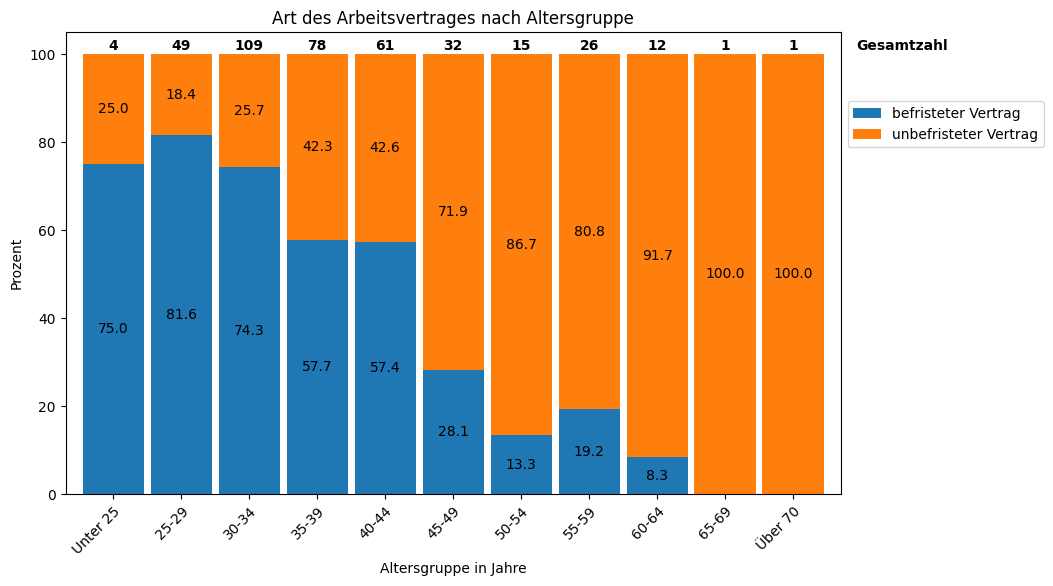

In [21]:
ax = age_con_df[age_con_perc_col].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(10, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach Altersgruppe',
                                        xlabel='Altersgruppe in Jahre'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(age_con_df['totals']):
    ax.text(age_con_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(decoded_age_level, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [22]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_01_Alter_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

## working contract vs being first academic

In [23]:
con_acad_df, con_acad_perc = cross_analysis_non_one_hot('CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?', ls_cols_contract)

In [24]:
con_acad_df

,CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Perc,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Perc"
0,0.0,130,90,220,59.090909,40.909091
1,1.0,86,76,162,53.086420,46.913580


Text(1.02, 0.985, 'Gesamtzahl')

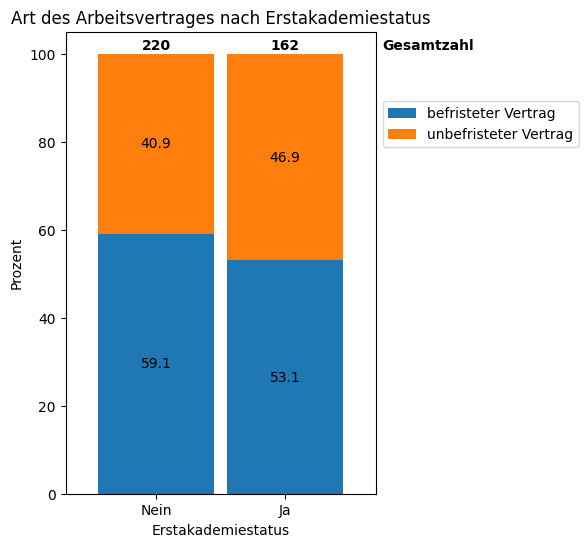

In [25]:
ax = con_acad_df[con_acad_perc].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(4, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach Erstakademiestatus',
                                        xlabel='Erstakademiestatus'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(con_acad_df['totals']):
    ax.text(con_acad_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(['Nein', 'Ja'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [26]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_02_Erstakademiker_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

#### working contract vs first language German

In [27]:
con_lang_df, con_lang_perc = cross_analysis_non_one_hot('CO4. Ist\xa0Deutsch Ihre Erstsprache?', ls_cols_contract)

In [28]:
con_lang_df

,CO4. Ist Deutsch Ihre Erstsprache?,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Perc,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Perc"
0,0.0,12,5,17,70.588235,29.411765
1,1.0,212,166,378,56.084656,43.915344


Text(1.02, 0.985, 'Gesamtzahl')

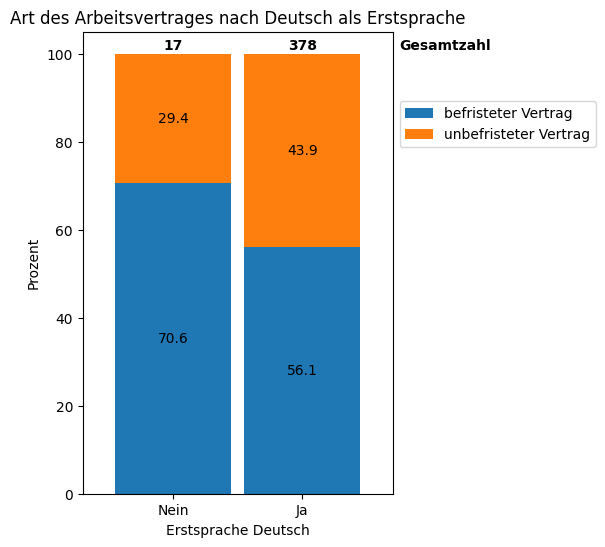

In [29]:
ax = con_lang_df[con_lang_perc].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(4, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach Deutsch als Erstsprache',
                                        xlabel='Erstsprache Deutsch'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(con_lang_df['totals']):
    ax.text(con_lang_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(['Nein', 'Ja'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [30]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_03_Erstsprache_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

## working contract vs gender

In [31]:
ls_cols_gender = [col for col in df_whole if col.startswith('CO6.')]

con_gender_df, con_gender_perc = cross_analysis_one_hot(ls_cols_gender, ls_cols_contract)
con_gender_df

,M9. Sind Sie momentan befristet beschäftigt? _1,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.",totals,M9. Sind Sie momentan befristet beschäftigt? _1Percentage,"M9. Sind Sie momentan befristet beschäftigt? _Nein, ich habe eine entfristete Stelle.Percentage"
CO6. Welchem Geschlecht ordnen Sie sich zu?_Divers,1,0,1,100.000000,0.000000
CO6. Welchem Geschlecht ordnen Sie sich zu?_Männlich,28,43,71,39.436620,60.563380
CO6. Welchem Geschlecht ordnen Sie sich zu?_Weiblich,194,128,322,60.248447,39.751553


Text(1.02, 0.985, 'Gesamtzahl')

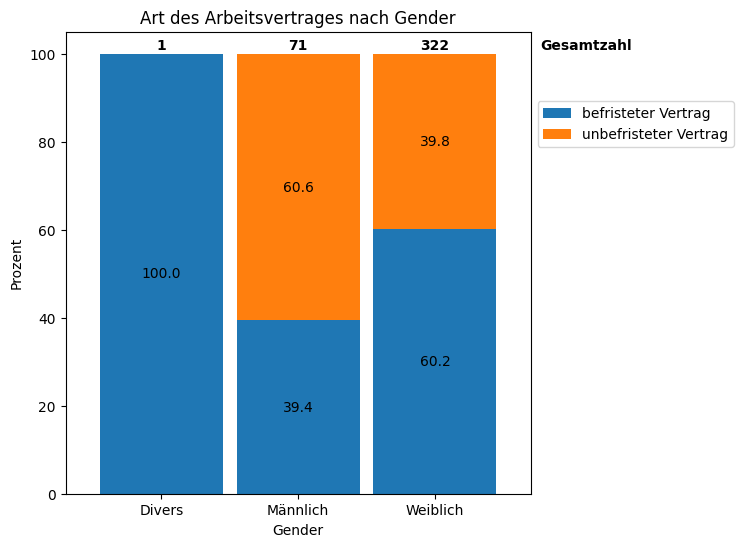

In [32]:
ax = con_gender_df[con_gender_perc].plot(kind='bar', 
                                        stacked=True, 
                                        figsize=(6, 6), 
                                        rot=45, ylabel='Prozent', 
                                        width=0.9, 
                                        title='Art des Arbeitsvertrages nach Gender',
                                        xlabel='Gender'
                                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(con_gender_df['totals']):
    ax.text(con_gender_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.set_xticklabels(['Divers', 'Männlich', 'Weiblich'], rotation=0, ha='center', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['befristeter Vertrag', 'unbefristeter Vertrag'])

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [33]:
fig = ax.get_figure()
fig.savefig('../reports/figures/M_04_Gender_vs_Arbeitsvertrag.png', bbox_inches='tight', dpi=300)

## bullying vs career type

In [34]:
#extract columns with career and bullying
ls_cols_career = [col for col in df_whole if col.startswith('AP14')]
ls_cols_bullying = [col for col in df_whole if col.startswith('CO7r')]

#extract career levels
career = [entry.split('Fragen:\xa0_')[1] for entry in ls_cols_career]
print(career)
print(ls_cols_career)

#extract bullying levels
# Regular expression to find a string inside square brackets at the end of column
pattern = re.compile(r'\[([^\]]*)\]$')
bullying_levels = [pattern.search(col).group(1) if pattern.search(col) else None for col in ls_cols_bullying]
print(bullying_levels)

['Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit', 'Freiberufler:in', 'Freie Wirtschaft', 'Museums- oder Ausstellungswesen und Denkmalpflege', 'Stipendiat:in', 'Universität, Hochschule oder außeruniversitäre Forschungseinrichtung']
['AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen:\xa0_Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit', 'AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.\xa0  Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für S

In [65]:
car_bul_df, car_bul_perc = cross_analysis_non_one_hot('CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt?\xa0\xa0',
                                                      ls_cols_career)

In [66]:
car_bul_df

,"CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt?","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",totals,"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche ArbeitPerc","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:inPerc","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie WirtschaftPerc","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und D

In [68]:
car_bul_df.T

,0,1
"CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt?",0.000000,1.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",33.000000,37.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",58.000000,48.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",30.000000,14.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",252.000000,121.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",25.000000,17.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",172.000000,97.000000
totals,570.000000,334.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche ArbeitPerc",5.789474,11.077844
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:inPerc",10.175439,14.371257


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (6).

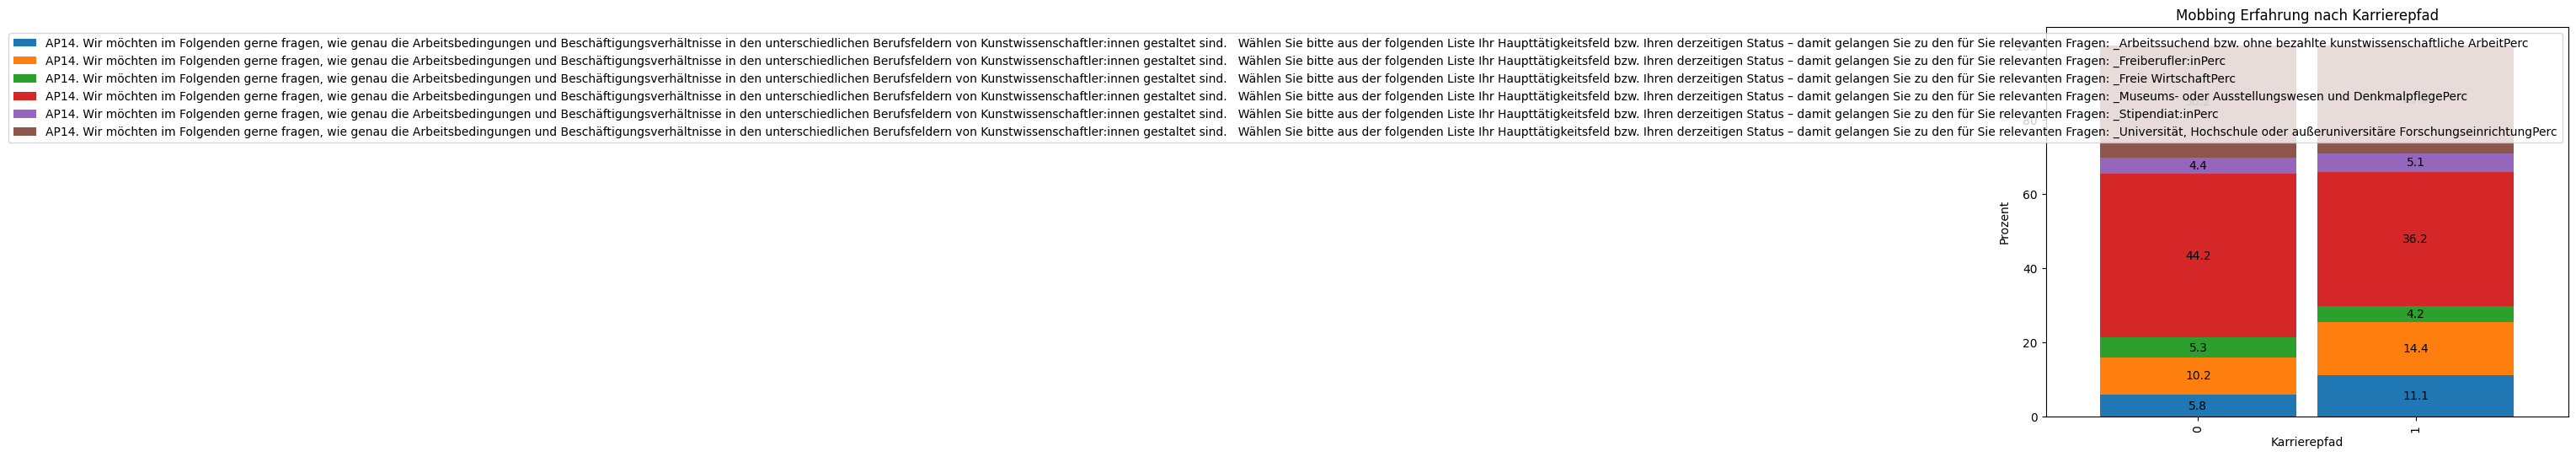

In [67]:
ax = car_bul_df[car_bul_perc].plot(kind='bar', 
                                    stacked=True, 
                                    figsize=(8, 6),                                                                                        
                                    ylabel='Prozent',
                                    xlabel='Karrierepfad',
                                    width=0.9,
                                    title='Mobbing Erfahrung nach Karrierepfad'
                                    )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(career, rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['keine Mobbingerfahrung', 'Mobbingerfahrung'])
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(car_bul_df['totals']):
    ax.text(car_bul_df['totals'].reset_index().index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

Text(1.02, 0.985, 'Gesamtzahl')

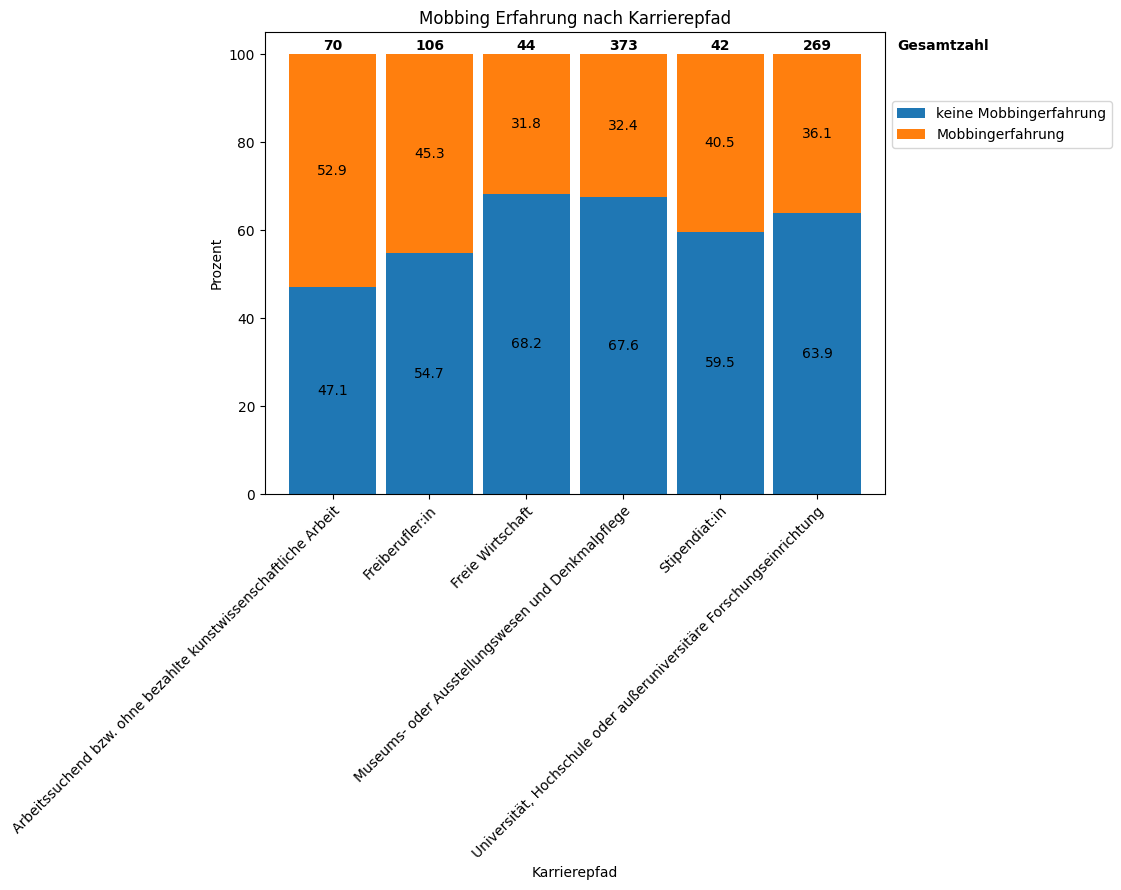

In [37]:
ax = df_career_bully_pivot[['CareerPath', 'BullyingNotExperienced_Perc', 'BullyingExperienced_Perc']].set_index('CareerPath').plot(kind='bar', 
                                                                                          stacked=True, 
                                                                                          figsize=(8, 6),                                                                                        
                                                                                          #rot=45,
                                                                                          ylabel='Prozent',
                                                                                          xlabel='Karrierepfad',
                                                                                          width=0.9,
                                                                                          title='Mobbing Erfahrung nach Karrierepfad'
                                                                                          )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(df_career_bully_pivot['CareerPath'], rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['keine Mobbingerfahrung', 'Mobbingerfahrung'])
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(df_career_bully_pivot['totals']):
    ax.text(df_career_bully_pivot['totals'].index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [38]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_00_Pfad_vs_Mobbing.png', bbox_inches='tight', dpi=300)

In [39]:
ls_cols_bullying

['CO7r[SQ001]. Aus welchen Gründen? [Abschluss oder akademischer Grad]',
 'CO7r[SQ002]. Aus welchen Gründen? [Alter ]',
 'CO7r[SQ003]. Aus welchen Gründen? [Beeinträchtigung bzw. chronische Krankheit ]',
 'CO7r[SQ004]. Aus welchen Gründen? [Care-Verpflichtungen: Kinder]',
 'CO7r[SQ005]. Aus welchen Gründen? [Care-Verpflichtungen: pflegebedürftige Angehörige]',
 'CO7r[SQ006]. Aus welchen Gründen? [Erstsprache ]',
 'CO7r[SQ007]. Aus welchen Gründen? [Geschlecht bzw. Geschlechtsidentität]',
 'CO7r[SQ008]. Aus welchen Gründen? [Klasse (z.B. Erstakademiker:in)]',
 'CO7r[SQ009]. Aus welchen Gründen? [Konkurrenzkämpfe]',
 'CO7r[SQ010]. Aus welchen Gründen? [Rassifizierende Zuschreibung]',
 'CO7r[SQ011]. Aus welchen Gründen? [Religion bzw. Weltanschauung (inklusive Zuschreibungen)]',
 'CO7r[SQ012]. Aus welchen Gründen? [Sexuelle Identität bzw. Orientierung (inklusive Zuschreibungen)]',
 'CO7r[SQ013]. Aus welchen Gründen? [Staatsangehörigkeit]']

#### bullying types vs career paths

In [40]:
#Analysis of only those entries that experienced bullying
df_bullying = df_whole[df_whole['CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt?\xa0\xa0']==1]

In [41]:
len(df_bullying['CO7. Werden oder wurden Sie im beruflichen Umfeld diskriminiert, abgewertet, gemobbt oder ohne sachliche Rechtfertigung benachteiligt?\xa0\xa0'])

334

In [42]:
df_bullying_types = df_bullying[ls_cols_career + ls_cols_bullying]
df_bullying_types

,"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",CO7r[SQ001]. Aus welchen Gründen? [Abschluss oder akademischer Grad],CO7r[SQ002]. Aus welchen Gründen? [Alter ],CO7r[SQ003]. Aus welchen Gründen? [Beeinträchtigung bzw. chronische Krankheit ],CO7r[SQ004]. Aus welchen Gründen? [Care-Verpflichtungen: Kinder],CO7r[SQ005]. Aus welchen Gründen? [Care-Verpflichtungen: pflegebedürftige Angehörige],CO7r[SQ006]. Aus welchen Gründen? [Erstsprache ],CO7r[SQ007]. Aus welchen Gründen? [Geschlecht bzw. Geschlechtsidentität],CO7r[SQ008]. Aus welchen Gründen? [Klasse (z.B. Erstakademiker:in)],CO7r[SQ009]. Aus welchen Gründen? [Konkurrenzkämpfe],CO7r[SQ010]. Aus welchen Gründen? [Rassifizierende Zuschreibung],CO7r[SQ011]. Aus welchen Gründen? [Religion bzw. Weltanschauung (inklusive Zuschreibungen)],CO7r[SQ012]. Aus welchen Gründen? [Sexuelle Identität bzw. Orientierung (inklusive Zuschreibungen)],CO7r[SQ013]. Aus welchen Gründen? [Staatsangehörigkeit]
2,False,False,False,False,True,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,False,False,False,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,False,False,False,False,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11,False,False,False,False,False,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,False,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,False,False,False,True,False,False,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1004,False,False,False,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1008,False,False,False,False,False,True,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0

In [43]:
# initialize empty DataFrame
aggregated_df = pd.DataFrame(index=ls_cols_career, columns=ls_cols_bullying).fillna(0)

for career_path in ls_cols_career:
    for bullying_type in ls_cols_bullying:
        # Sum the bullying counts for the current career path
        aggregated_df.loc[career_path, bullying_type] = df_whole[df_whole[career_path] == True][bullying_type].sum()
        
# rename indices and column names
aggregated_df.columns = bullying_levels

#aggregated_df.index = career
aggregated_df['totals'] = aggregated_df.sum(axis=1)

In [44]:
ls_perc_columns = []
for bullying_type in aggregated_df.loc[:, aggregated_df.columns != 'totals'].columns:
    percentage_column_name = f'{bullying_type}Percentage'
    ls_perc_columns.append(percentage_column_name)
    aggregated_df[percentage_column_name] = (aggregated_df[bullying_type] / aggregated_df['totals']) * 100
    
#aggregated_df = aggregated_df.reset_index()

In [45]:
aggregated_df[ls_perc_columns].sum(axis=1)

AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.   Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit         100.0
AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.   Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in                                                         100.0
AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern 

In [46]:
aggregated_df['totals']

AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.   Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit          88
AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.   Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in                                                         115
AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von 

In [47]:
aggregated_df = aggregated_df.reset_index()

In [48]:
aggregated_df['index'] = career
aggregated_df = aggregated_df.rename(columns={'index':'Career'})

Text(1.02, 0.5, 'Mehrfachnennung waren möglich')

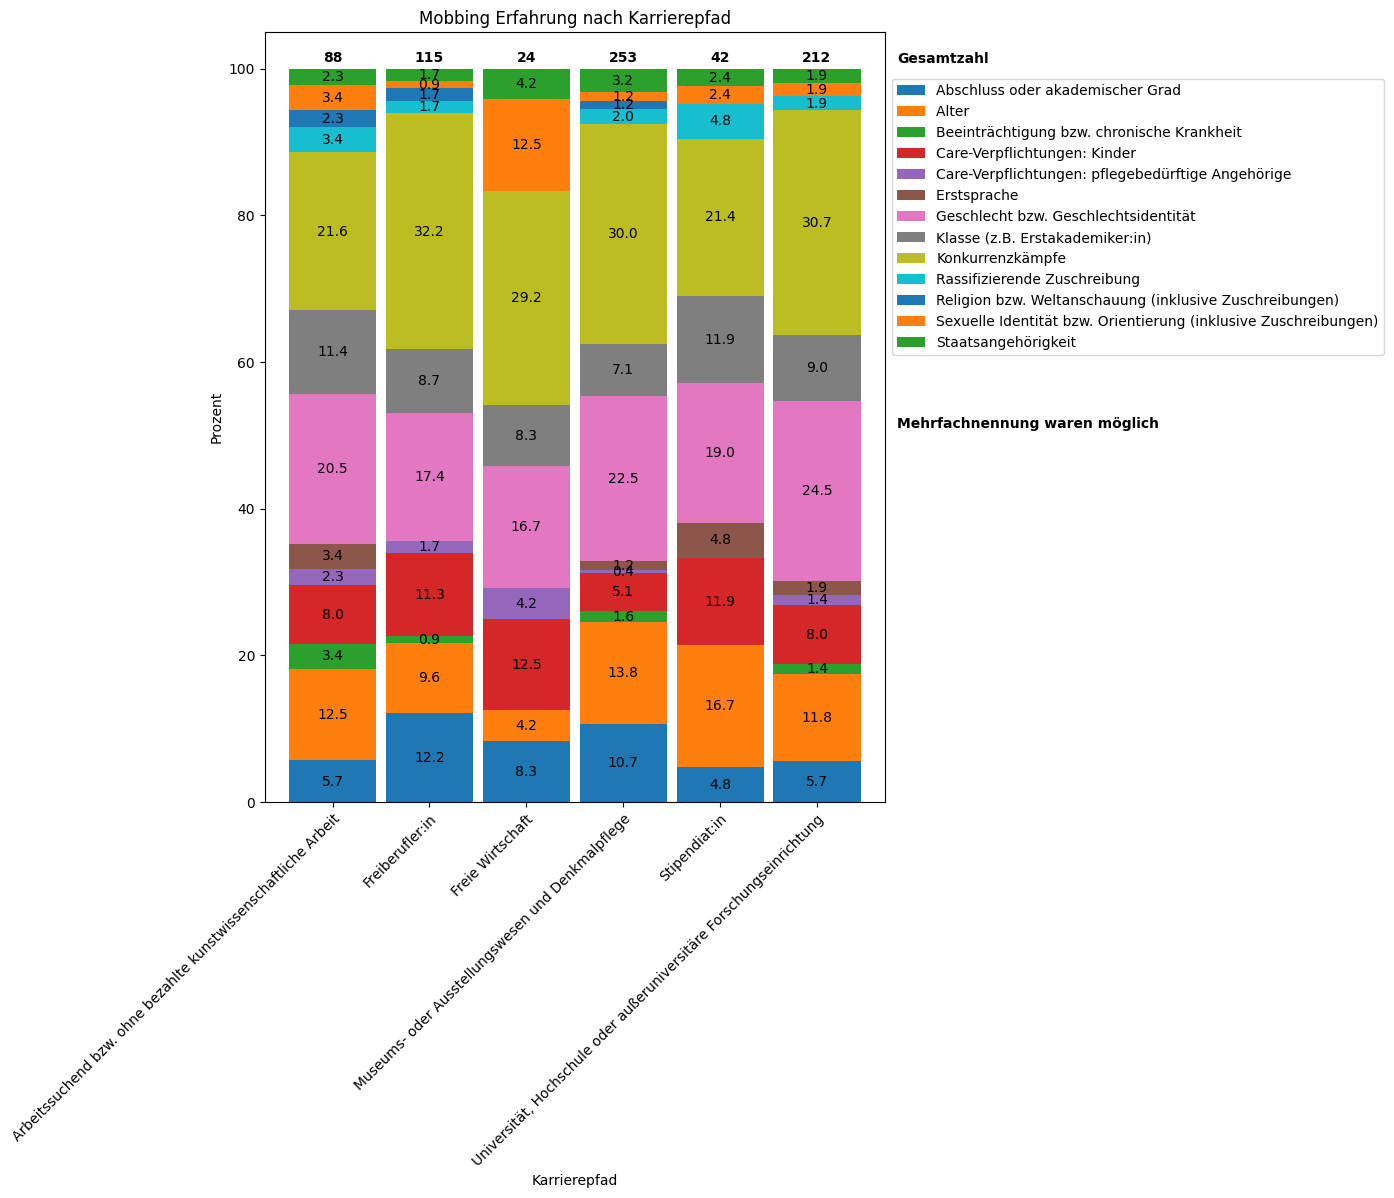

In [49]:
ax = aggregated_df[ls_perc_columns].plot(kind='bar', 
                        stacked=True, 
                        figsize=(8, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        xlabel='Karrierepfad',
                        width=0.9,
                        title='Mobbing Erfahrung nach Karrierepfad'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(aggregated_df['Career'], rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=bullying_levels)

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(aggregated_df['totals']):
    ax.text(aggregated_df['totals'].index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')
ax.text(1.02, 0.5, 'Mehrfachnennung waren möglich', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')
    


In [50]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_01_Pfad_vs_Mobbingarten.png', bbox_inches='tight', dpi=300)

Hypothesis: Stipendholders report more often mobbing based on their first language (CO4) and class (CO1) because there are more non-native speaker and first time academics among them. 

In [51]:
df_career_lang = df_whole[ls_cols_career + ['CO4. Ist\xa0Deutsch Ihre Erstsprache?']]
df_career_lang

,"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",CO4. Ist Deutsch Ihre Erstsprache?
0,False,False,False,True,False,False,1.0
1,False,False,False,True,False,False,0.0
2,False,False,False,False,True,False,1.0
3,False,False,False,True,False,False,1.0
4,False,False,False,False,False,True,1.0
...,...,...,...,...,...,...,...
1010,False,True,False,False,False,False,1.0
1011,False,False,False,False,False,True,1.0
1012,False,False,False,True,False,False,1.0
1013,True,False,False,False,False,False,1.0


In [52]:
# Melt the DataFrame
df_career_lang_melt = df_career_lang.melt(id_vars=['CO4. Ist\xa0Deutsch Ihre Erstsprache?'], var_name='CareerPath', value_name='IsInPath')

# Filter out rows where IsInPath is False
df_career_lang_filter = df_career_lang_melt[df_career_lang_melt['IsInPath'] == True]

# Group by CareerPath and native language and count occurrences
df_career_lang_agg = df_career_lang_filter.groupby(['CareerPath', 'CO4. Ist\xa0Deutsch Ihre Erstsprache?']).size().reset_index(name='Count')

# Pivot to wide format
df_career_lang_pivot = df_career_lang_agg.pivot(index='CareerPath', columns='CO4. Ist\xa0Deutsch Ihre Erstsprache?', values='Count').fillna(0)

# Rename columns for clarity
df_career_lang_pivot.columns = ['NonNative', 'Native']

# Reset index to turn the index into a column
df_career_lang_pivot.reset_index(inplace=True)
df_career_lang_pivot['CareerPath'] = career

# calculate percentage values
df_career_lang_pivot['totals'] = df_career_lang_pivot['NonNative'] + df_career_lang_pivot['Native']
df_career_lang_pivot['NonNative_Perc'] = (df_career_lang_pivot['NonNative'] / df_career_lang_pivot['totals'])*100
df_career_lang_pivot['Native_Perc'] = (df_career_lang_pivot['Native'] / df_career_lang_pivot['totals'])*100
df_career_lang_pivot


,CareerPath,NonNative,Native,totals,NonNative_Perc,Native_Perc
0,Arbeitssuchend bzw. ohne bezahlte kunstwissens...,6,68,74,8.108108,91.891892
1,Freiberufler:in,6,107,113,5.309735,94.690265
2,Freie Wirtschaft,2,44,46,4.347826,95.652174
3,Museums- oder Ausstellungswesen und Denkmalpflege,17,383,400,4.250000,95.750000
4,Stipendiat:in,4,40,44,9.090909,90.909091
5,"Universität, Hochschule oder außeruniversitäre...",24,265,289,8.304498,91.695502


Text(1.02, 0.985, 'Gesamtzahl')

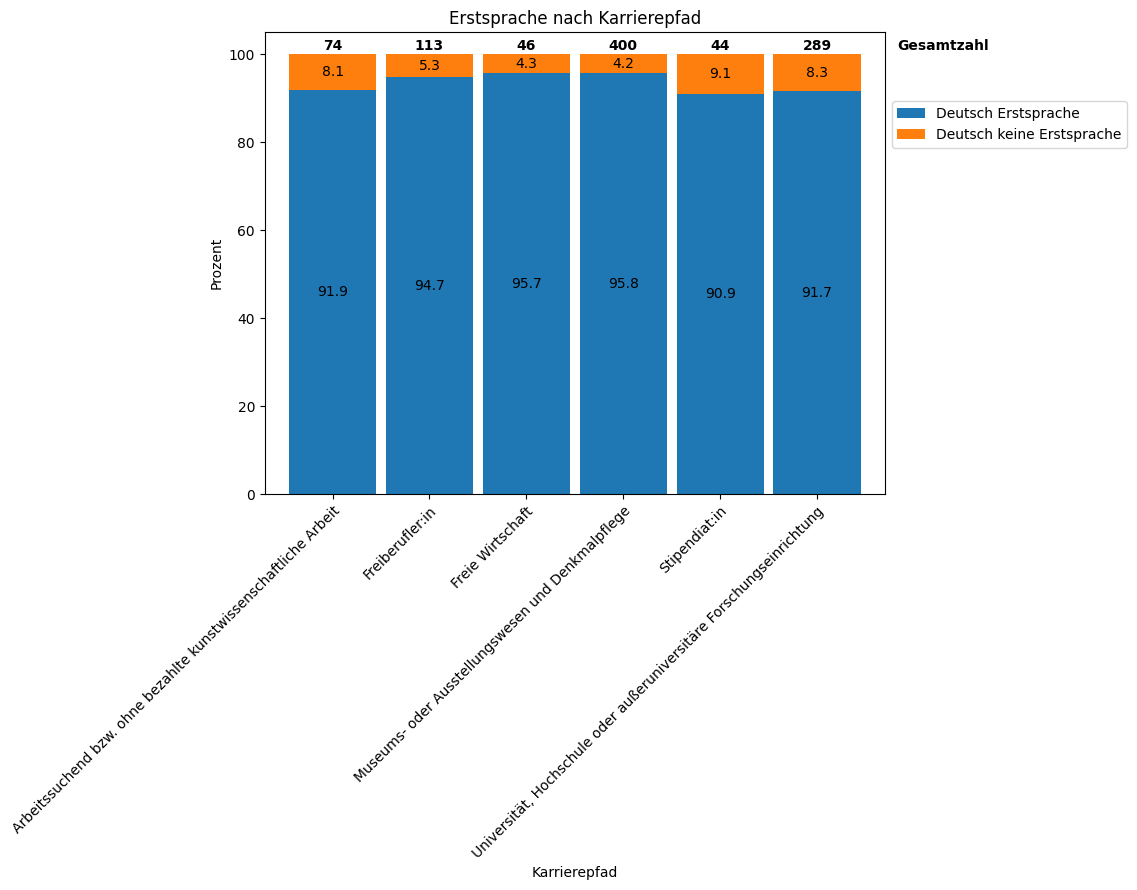

In [53]:
ax = df_career_lang_pivot[['CareerPath', 'Native_Perc', 'NonNative_Perc']].set_index('CareerPath').plot(kind='bar', 
                                                                                          stacked=True, 
                                                                                          figsize=(8, 6),                                                                                        
                                                                                          #rot=45,
                                                                                          ylabel='Prozent',
                                                                                          xlabel='Karrierepfad',
                                                                                          width=0.9,
                                                                                          title='Erstsprache nach Karrierepfad'
                                                                                          )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(df_career_lang_pivot['CareerPath'], rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['Deutsch Erstsprache', 'Deutsch keine Erstsprache'])
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(df_career_lang_pivot['totals']):
    ax.text(df_career_lang_pivot['totals'].index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [54]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_02_Pfad_vs_Erstsprache.png', bbox_inches='tight', dpi=300)

Yes stipend holders have the highest percentage of non-native german speaking individuals. However it's not significantly more than the population of individuals working in universities and non-university academic institutions. This does not explain why stipend holders face more bullying based on their native language.

In [55]:
df_career_class = df_whole[ls_cols_career + ['CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?']]
df_career_class

,"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?
0,False,False,False,True,False,False,1.0
1,False,False,False,True,False,False,0.0
2,False,False,False,False,True,False,1.0
3,False,False,False,True,False,False,0.0
4,False,False,False,False,False,True,1.0
...,...,...,...,...,...,...,...
1010,False,True,False,False,False,False,1.0
1011,False,False,False,False,False,True,0.0
1012,False,False,False,True,False,False,0.0
1013,True,False,False,False,False,False,1.0


In [56]:
# Melt the DataFrame
df_career_class_melt = df_career_class.melt(id_vars=['CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?'], var_name='CareerPath', value_name='IsInPath')

# Filter out rows where IsInPath is False
df_career_class_filter = df_career_class_melt[df_career_class_melt['IsInPath'] == True]

# Group by CareerPath and native classuage and count occurrences
df_career_class_agg = df_career_class_filter.groupby(['CareerPath', 'CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?']).size().reset_index(name='Count')

# Pivot to wide format
df_career_class_pivot = df_career_class_agg.pivot(index='CareerPath', columns='CO1. Sind Sie sogenannte:r Erstakademiker:in in Ihrer Familie?', values='Count').fillna(0)

# Rename columns for clarity
df_career_class_pivot.columns = ['NonFirst', 'First']

# Reset index to turn the index into a column
df_career_class_pivot.reset_index(inplace=True)
df_career_class_pivot['CareerPath'] = career

# calculate percentage values
df_career_class_pivot['totals'] = df_career_class_pivot['NonFirst'] + df_career_class_pivot['First']
df_career_class_pivot['NonFirst_Perc'] = (df_career_class_pivot['NonFirst'] / df_career_class_pivot['totals'])*100
df_career_class_pivot['First_Perc'] = (df_career_class_pivot['First'] / df_career_class_pivot['totals'])*100
df_career_class_pivot


,CareerPath,NonFirst,First,totals,NonFirst_Perc,First_Perc
0,Arbeitssuchend bzw. ohne bezahlte kunstwissens...,40,34,74,54.054054,45.945946
1,Freiberufler:in,60,51,111,54.054054,45.945946
2,Freie Wirtschaft,24,21,45,53.333333,46.666667
3,Museums- oder Ausstellungswesen und Denkmalpflege,221,166,387,57.105943,42.894057
4,Stipendiat:in,20,25,45,44.444444,55.555556
5,"Universität, Hochschule oder außeruniversitäre...",160,117,277,57.761733,42.238267


Text(1.02, 0.985, 'Gesamtzahl')

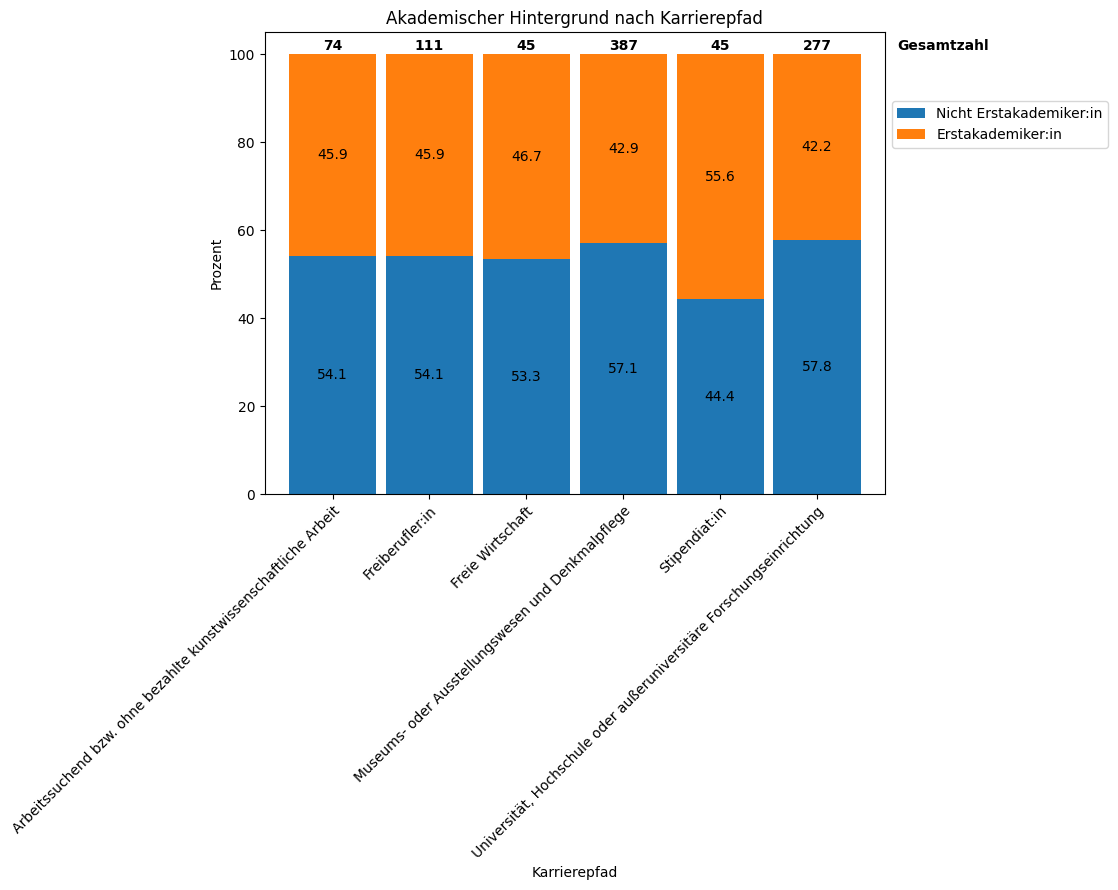

In [57]:
ax = df_career_class_pivot[['CareerPath', 'NonFirst_Perc', 'First_Perc']].set_index('CareerPath').plot(kind='bar', 
                                                                                          stacked=True, 
                                                                                          figsize=(8, 6),                                                                                        
                                                                                          #rot=45,
                                                                                          ylabel='Prozent',
                                                                                          xlabel='Karrierepfad',
                                                                                          width=0.9,
                                                                                          title='Akademischer Hintergrund nach Karrierepfad'
                                                                                          )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(df_career_class_pivot['CareerPath'], rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), labels=['Nicht Erstakademiker:in', 'Erstakademiker:in'])
    
#add total values of entries above bar
y_offset = 4
for i, total in enumerate(df_career_class_pivot['totals']):
    ax.text(df_career_class_pivot['totals'].index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.985, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [58]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_03_Pfad_vs_Erstakademie.png', bbox_inches='tight', dpi=300)

There are indeed ~ 10% more stipend holders that report to be first in their families to have an academic degree. This could explain why there are more reported cases of classism within stipend holders.

#### Career vs. Age Group

In [59]:
df_career_age = df_whole[ls_cols_age_level + ls_cols_career]
df_career_age

,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,AP1. Wie alt sind Sie?_8.0,AP1. Wie alt sind Sie?_9.0,AP1. Wie alt sind Sie?_10.0,"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in","AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung"
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1011,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1012,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1013,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [60]:
# initialize empty DataFrame
aggregated_df = pd.DataFrame(index=ls_cols_career, columns=ls_cols_age_level).fillna(0)

for career_path in ls_cols_career:
    for age_level in ls_cols_age_level:
        # Sum the age counts for the current career path
        aggregated_df.loc[career_path, age_level] = df_whole[df_whole[career_path] == True][age_level].sum()
        
# rename indices and column names
aggregated_df.columns = ls_cols_age_level

#aggregated_df.index = career
aggregated_df['totals'] = aggregated_df.sum(axis=1)
aggregated_df

,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,AP1. Wie alt sind Sie?_8.0,AP1. Wie alt sind Sie?_9.0,AP1. Wie alt sind Sie?_10.0,totals
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",0,7,23,22,7,3,8,2,1,1,0,74
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",1,7,19,11,16,16,18,13,8,2,1,112
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",1,3,13,7,12,3,4,3,1,1,0,48
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",4,49,109,78,62,33,15,26,12,2,3,393
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",1,8,26,7,3,0,0,0,0,0,0,45
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",2,31,70,66,45,26,17,14,7,2,1,281


In [61]:
ls_perc_columns = []
for age_level in aggregated_df.loc[:, aggregated_df.columns != 'totals'].columns:
    percentage_column_name = f'{age_level}Percentage'
    ls_perc_columns.append(percentage_column_name)
    aggregated_df[percentage_column_name] = (aggregated_df[age_level] / aggregated_df['totals']) * 100
    
aggregated_df

,AP1. Wie alt sind Sie?_0.0,AP1. Wie alt sind Sie?_1.0,AP1. Wie alt sind Sie?_2.0,AP1. Wie alt sind Sie?_3.0,AP1. Wie alt sind Sie?_4.0,AP1. Wie alt sind Sie?_5.0,AP1. Wie alt sind Sie?_6.0,AP1. Wie alt sind Sie?_7.0,AP1. Wie alt sind Sie?_8.0,AP1. Wie alt sind Sie?_9.0,...,AP1. Wie alt sind Sie?_1.0Percentage,AP1. Wie alt sind Sie?_2.0Percentage,AP1. Wie alt sind Sie?_3.0Percentage,AP1. Wie alt sind Sie?_4.0Percentage,AP1. Wie alt sind Sie?_5.0Percentage,AP1. Wie alt sind Sie?_6.0Percentage,AP1. Wie alt sind Sie?_7.0Percentage,AP1. Wie alt sind Sie?_8.0Percentage,AP1. Wie alt sind Sie?_9.0Percentage,AP1. Wie alt sind Sie?_10.0Percentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",0,7,23,22,7,3,8,2,1,1,...,9.459459,31.081081,29.729730,9.459459,4.054054,10.810811,2.702703,1.351351,1.351351,0.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",1,7,19,11,16,16,18,13,8,2,...,6.250000,16.964286,9.821429,14.285714,14.285714,16.071429,11.607143,7.142857,1.785714,0.892857
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",1,3,13,7,12,3,4,3,1,1,...,6.250000,27.083333,14.583333,25.000000,6.250000,8.333333,6.250000,2.083333,2.083333,0.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",4,49,109,78,62,33,15,26,12,2,...,12.468193,27.735369,19.847328,15.776081,8.396947,3.816794,6.615776,3.053435,0.508906,0.763359
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",1,8,26,7,3,0,0,0,0,0,...,17.777778,57.777778,15.555556,6.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",2,31,70,66,45,26,17,14,7,2,...,11.032028,24.911032,23.487544,16.014235,9.252669,6.049822,4.982206,2.491103,0.711744,0.355872


In [62]:
aggregated_df[ls_perc_columns].sum(axis=1)

AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.   Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit         100.0
AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind.   Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in                                                         100.0
AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern 

In [63]:
aggregated_df = aggregated_df.reset_index()
aggregated_df['index'] = career
aggregated_df = aggregated_df.rename(columns={'index':'Career'})

NameError: name 'decoded_age_levels' is not defined

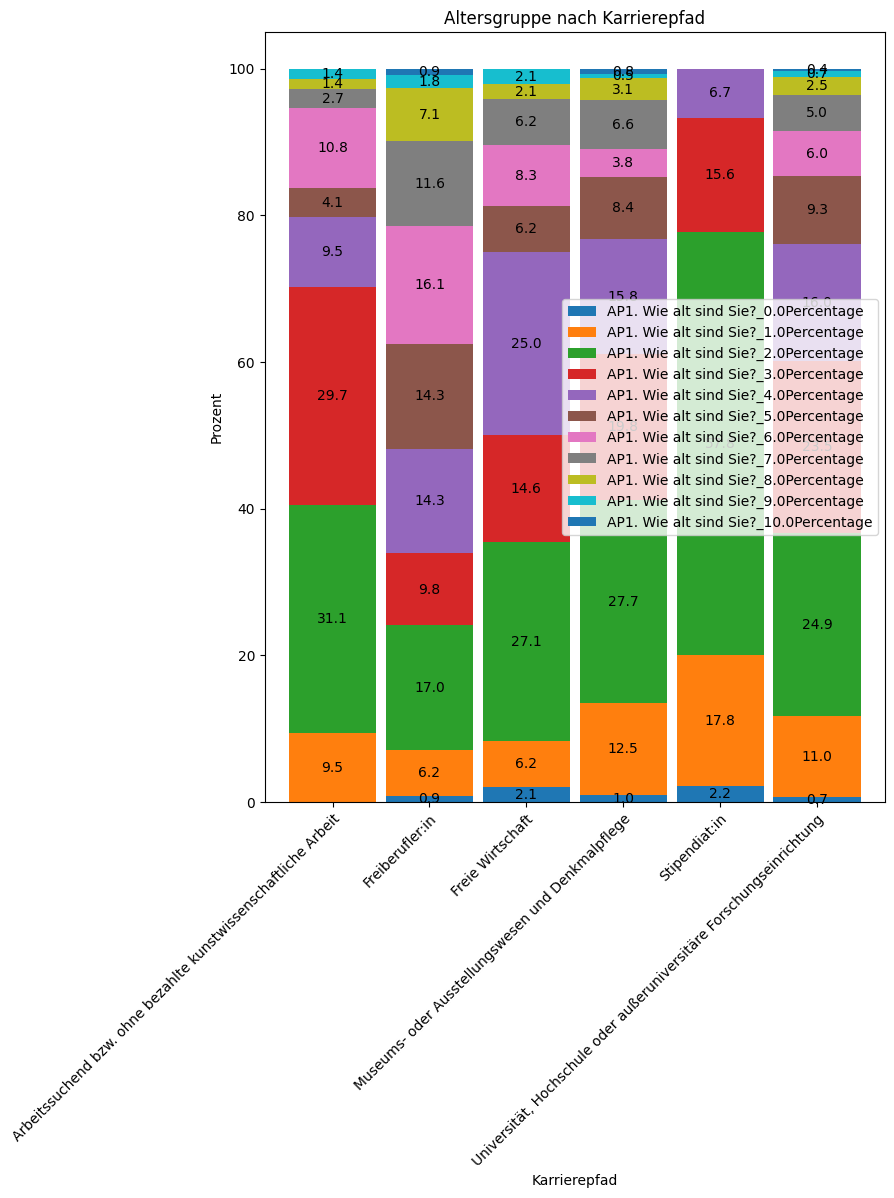

In [64]:
ax = aggregated_df[ls_perc_columns].plot(kind='bar', 
                        stacked=True, 
                        figsize=(8, 10),                                                                                        
                        #rot=45,
                        ylabel='Prozent',
                        xlabel='Karrierepfad',
                        width=0.9,
                        title='Altersgruppe nach Karrierepfad'
                        )

# add percentage labels into the bars
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, fmt=lambda x: f'{x:.1f}' if x > 0 else '', label_type='center')
    
ax.set_xticklabels(aggregated_df['Career'], rotation=45, ha='right', rotation_mode='anchor')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.76), labels=decoded_age_levels)

#add total values of entries above bar
y_offset = 4
for i, total in enumerate(aggregated_df['totals']):
    ax.text(aggregated_df['totals'].index[i], y= 101, s = total, ha='center',
    weight='bold')

ax.text(1.02, 0.975, 'Gesamtzahl', transform=ax.transAxes, fontsize=10, verticalalignment='top', weight='bold')

In [ ]:
fig = ax.get_figure()
fig.savefig('../reports/figures/AP_04_Pfad_vs_Alter.png', bbox_inches='tight', dpi=300)

* Karrierepfad vs Geschlecht
* Karrierepfad vs Kinder

In [ ]:
def cross_analysis_one_hot(cols_first:str, cols_second:str, df=df_whole):
    '''
    A function that performs a cross analysis between two one hot encoded questions. 
    It returns a dataframe with sum and percentage values for combinations of the first and second columns from the whole dataframe.
    
        Parameters:
            cols_first (list of strings of column names) -> those become the index of the new dataframe
            cols_second (list of string of column names) -> those become the columns of the new dataframe
            df (dataframe, standard: df_whole) -> dataframe with columns specified in cols_first and cols_second
    
        Returns:
            aggregated_df (df): aggregated dataframe with sum and percentage values of index-column combinations
            ls_perc_cols (str): list of strings, column names of percentage columns that can be used for data visualization
    '''
    
    # initialize empty DataFrame
    aggregated_df = pd.DataFrame(index=cols_first, columns=cols_second).fillna(0)

    for level_index in cols_first:
        for level_cols in cols_second:
            # Sum the age counts for the current career path
            aggregated_df.loc[level_index, level_cols] = df[df[level_index] == True][level_cols].sum()
        
    # rename indices and column names
    aggregated_df.columns = cols_second

    #aggregated_df.index = career
    aggregated_df['totals'] = aggregated_df.sum(axis=1)
    
    ls_perc_columns = []
    for col in aggregated_df.loc[:, aggregated_df.columns != 'totals'].columns:
        percentage_column_name = f'{col}Percentage'
        ls_perc_columns.append(percentage_column_name)
        aggregated_df[percentage_column_name] = (aggregated_df[col] / aggregated_df['totals']) * 100
    
    
    return aggregated_df, ls_perc_columns

In [ ]:
temp_df, temp_perc = cross_analysis_one_hot(ls_cols_career, ls_cols_gender)

In [ ]:
temp_df

,CO6. Welchem Geschlecht ordnen Sie sich zu?_Divers,CO6. Welchem Geschlecht ordnen Sie sich zu?_Männlich,CO6. Welchem Geschlecht ordnen Sie sich zu?_Weiblich,totals,CO6. Welchem Geschlecht ordnen Sie sich zu?_DiversPercentage,CO6. Welchem Geschlecht ordnen Sie sich zu?_MännlichPercentage,CO6. Welchem Geschlecht ordnen Sie sich zu?_WeiblichPercentage
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Arbeitssuchend bzw. ohne bezahlte kunstwissenschaftliche Arbeit",1,11,63,75,1.333333,14.666667,84.000000
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freiberufler:in",2,11,99,112,1.785714,9.821429,88.392857
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Freie Wirtschaft",0,10,37,47,0.000000,21.276596,78.723404
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Museums- oder Ausstellungswesen und Denkmalpflege",1,73,325,399,0.250627,18.295739,81.453634
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Stipendiat:in",1,7,37,45,2.222222,15.555556,82.222222
"AP14. Wir möchten im Folgenden gerne fragen, wie genau die Arbeitsbedingungen und Beschäftigungsverhältnisse in den unterschiedlichen Berufsfeldern von Kunstwissenschaftler:innen gestaltet sind. Wählen Sie bitte aus der folgenden Liste Ihr Haupttätigkeitsfeld bzw. Ihren derzeitigen Status – damit gelangen Sie zu den für Sie relevanten Fragen: _Universität, Hochschule oder außeruniversitäre Forschungseinrichtung",3,56,228,287,1.045296,19.512195,79.442509
